# Python Exercise : 3

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# importing simpleimputer
from sklearn.impute import SimpleImputer
import textwrap

In [2]:
# reading the data 
df = pd.read_csv('D:\Shivam\Python Ex\Indian stock market final sheet Part 1.xlsx - Indian Stock Market Top 2000.csv')
print('The shape of the data: ',df.shape)
df.head()

The shape of the data:  (2000, 44)


,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Profit Margin,5Y Avg EBITDA Margin,...,Net Income,PBT,Earnings Per Share,EBITDA,Long Term Investments,Reserves & Surplus,Cash and Equivalent,Book Value,Free Cash Flow,Operating Cash Flow
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Refining & Marketing,1.679534e+06,2467.40,34.186904,7.793277,3.957021,9.725370,17.720494,...,49128.00,55461.00,74.653049,103222.00,212382.00,579376.00,169843.00,799432.00,-79652.00,26185.00
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1.358569e+06,3626.70,41.892356,37.740680,25.932382,19.383065,29.072528,...,32430.00,43760.00,87.043624,48462.00,213.00,86063.00,38489.00,87108.00,35727.00,38802.00
2,HDFC Bank Ltd,HDFCBANK,Private Banks,8.206363e+05,1486.50,25.779258,16.435200,1.883433,20.420916,28.206116,...,31833.20,42796.14,57.899268,44181.15,438823.11,148746.23,121272.52,210442.95,40780.31,42476.46
3,Infosys Ltd,INFY,IT Services & Consulting,7.775010e+05,1853.05,40.178853,27.135305,19.417895,18.847214,28.656802,...,19351.00,26628.00,45.607423,30090.00,11863.00,73627.00,27056.00,76782.00,21117.00,23224.00
4,ICICI Bank Ltd,ICICIBANK,Private Banks,5.002790e+05,710.75,27.212283,12.382897,1.243333,11.395012,11.900543,...,18384.31,26028.33,27.461218,27368.40,536578.62,107231.52,147570.54,167175.84,136327.09,138015.30


In [3]:
#checking the no of columns
df.columns

Index(['Name', 'Ticker', 'Sub-Sector', 'Market Cap', 'Close Price', 'PE Ratio',
       'Return on Equity', 'Return on Assets', 'Net Profit Margin',
       '5Y Avg EBITDA Margin', 'EBITDA Margin', '1Y Return vs Nifty',
       '5Y CAGR', 'Debt to Equity', 'Long Term Debt to Equity',
       'Net Income / Liabilities', '5Y Historical Revenue Growth',
       '5Y Historical EBITDA Growth', '5Y Hist Op. Cash Flow Growth',
       '5Y Historical EPS Growth', 'Forward PE Ratio', 'Enterprise Value',
       'PB Ratio', 'Dividend Yield', 'PE Premium vs Sector',
       'Domestic Institutional Holding', 'Mutual Fund Holding',
       'Promoter Holding', 'Foreign Institutional Holding',
       'Retail Investor Holding', 'Pledged Promoter Holdings',
       'Insurance Firms Holding', 'No. of Shareholders', 'Total Revenue',
       'Net Income', 'PBT', 'Earnings Per Share', 'EBITDA',
       'Long Term Investments', 'Reserves & Surplus', 'Cash and Equivalent',
       'Book Value', 'Free Cash Flow', 'Operati

In [4]:
#checking the missing values 
df.isnull().sum()

Name                                 0
Ticker                               0
Sub-Sector                          53
Market Cap                           0
Close Price                          0
PE Ratio                            43
Return on Equity                   130
Return on Assets                    48
Net Profit Margin                   47
5Y Avg EBITDA Margin               120
EBITDA Margin                       47
1Y Return vs Nifty                   0
5Y CAGR                            407
Debt to Equity                     165
Long Term Debt to Equity           167
Net Income / Liabilities           443
5Y Historical Revenue Growth       129
5Y Historical EBITDA Growth        376
5Y Hist Op. Cash Flow Growth       727
5Y Historical EPS Growth           671
Forward PE Ratio                  1469
Enterprise Value                     1
PB Ratio                            46
Dividend Yield                     902
PE Premium vs Sector                43
Domestic Institutional Ho

### Missing value imputation

In [5]:
columns = [col for col in df.columns if df[col].dtypes != 'object']
imputer = SimpleImputer(strategy='mean') 
imputer.fit(df[columns])
df[columns] = pd.DataFrame(imputer.transform(df[columns]),columns=columns)

In [6]:
columns = [col for col in df.columns if df[col].dtypes == 'object']
imputer = SimpleImputer(strategy='most_frequent') 
imputer.fit(df[columns])
df[columns] = pd.DataFrame(imputer.transform(df[columns]),columns=columns)

In [7]:
df.isnull().sum()

Name                              0
Ticker                            0
Sub-Sector                        0
Market Cap                        0
Close Price                       0
PE Ratio                          0
Return on Equity                  0
Return on Assets                  0
Net Profit Margin                 0
5Y Avg EBITDA Margin              0
EBITDA Margin                     0
1Y Return vs Nifty                0
5Y CAGR                           0
Debt to Equity                    0
Long Term Debt to Equity          0
Net Income / Liabilities          0
5Y Historical Revenue Growth      0
5Y Historical EBITDA Growth       0
5Y Hist Op. Cash Flow Growth      0
5Y Historical EPS Growth          0
Forward PE Ratio                  0
Enterprise Value                  0
PB Ratio                          0
Dividend Yield                    0
PE Premium vs Sector              0
Domestic Institutional Holding    0
Mutual Fund Holding               0
Promoter Holding            

# I. Compare the growth rates of companies in different sub-sectors.

In [8]:
task1 = pd.pivot_table(df, index='Sub-Sector',values=['5Y Historical Revenue Growth','5Y CAGR'])

In [9]:
print(task1.to_string())

                                         5Y CAGR  5Y Historical Revenue Growth
Sub-Sector                                                                    
0                                      76.378883                     -5.955065
Advertising                            30.156763                     33.066902
Aerospace & Defense Equipments         21.679128                      5.168827
Agricultural & Farm Machinery          -6.568724                      4.067687
Agro Products                          26.106838                     19.168232
Airlines                                0.134665                    -18.565123
Airports                              -17.312060                    -38.295083
Alcoholic Beverages                    15.502922                      0.420566
Animation                               1.654384                     12.815946
Apparel & Accessories                   7.878556                      3.595398
Asset Management                       12.903427    

#  II. Screen the companies and visualize them according to sub-sectors.

C:\Users\Mansi Bansal\AppData\Local\Temp\ipykernel_7724\1846084375.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


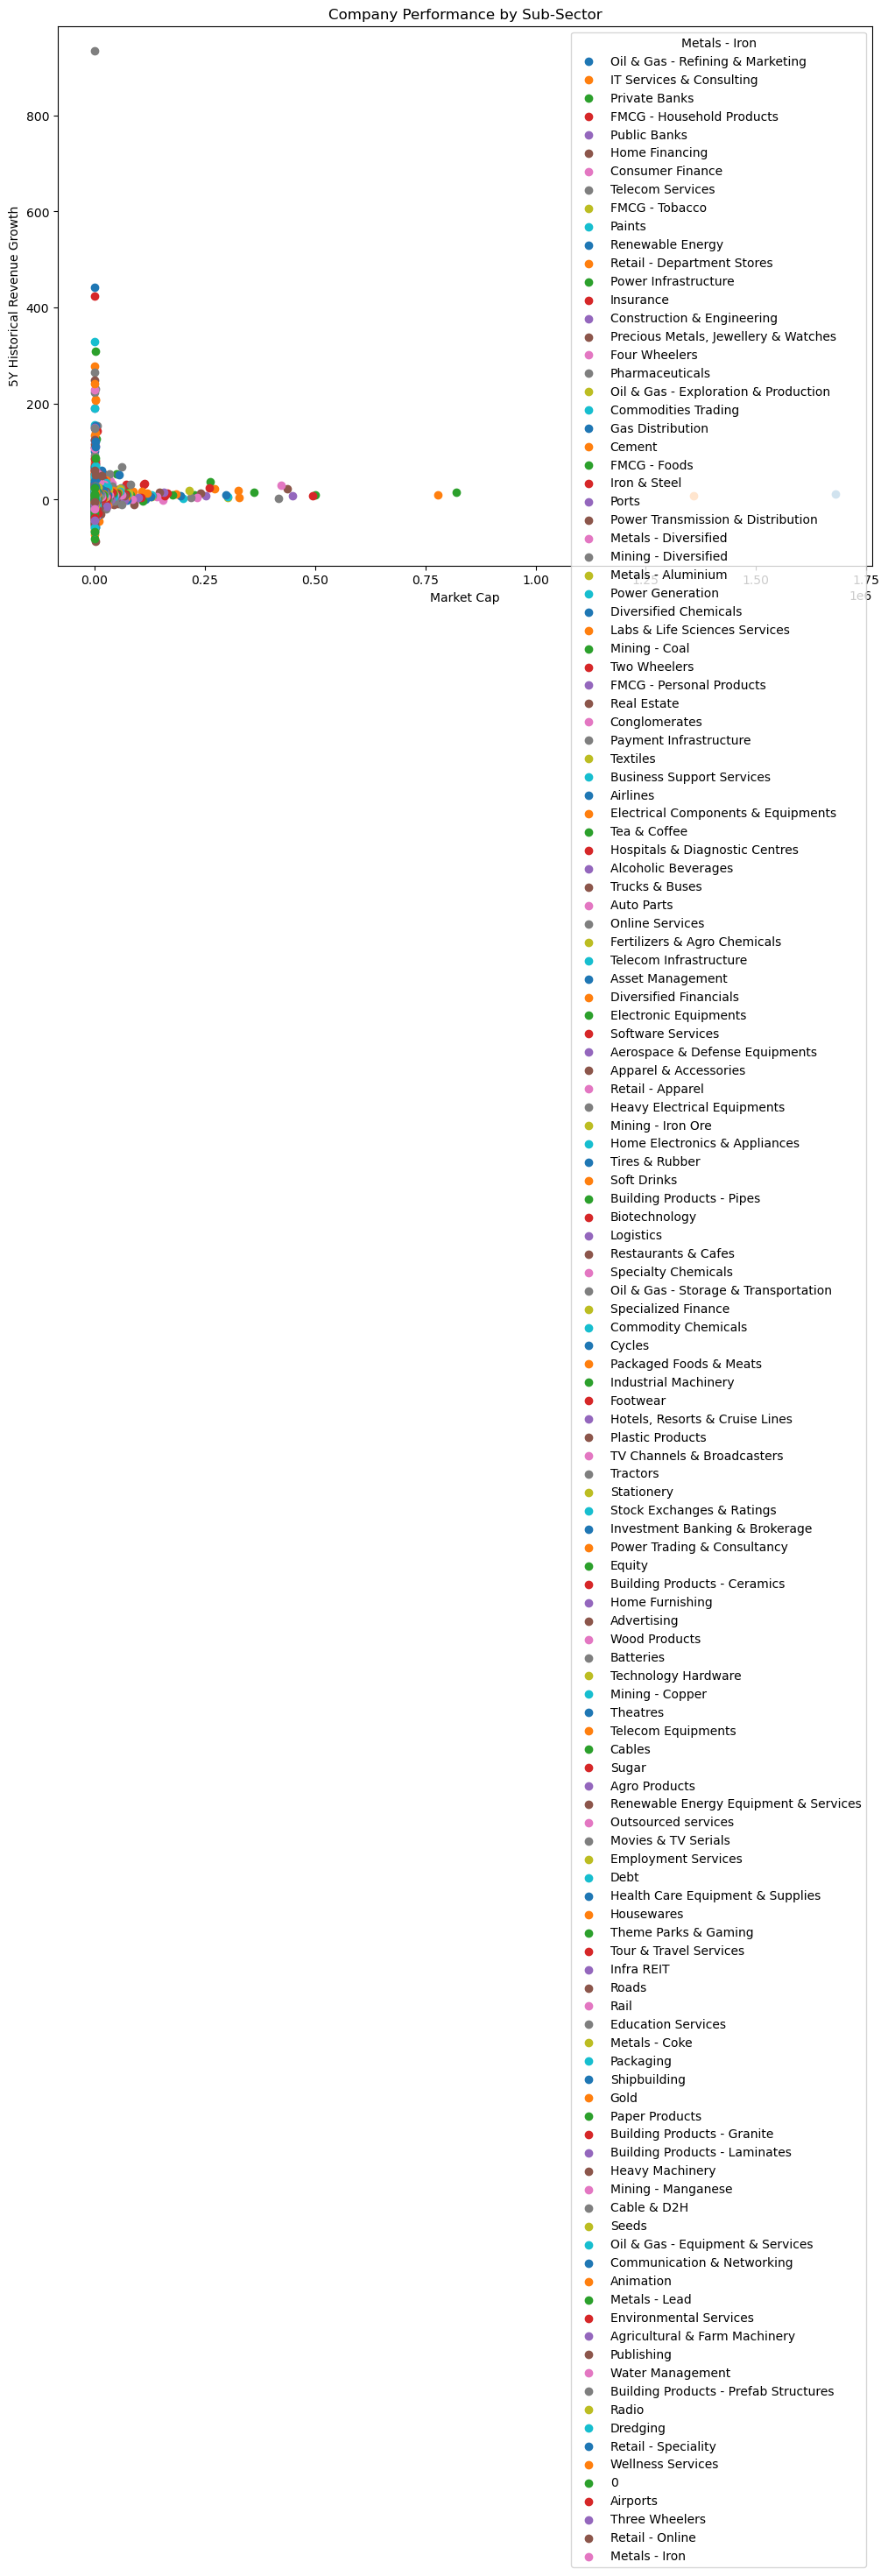

In [10]:
plt.figure(figsize=(12, 8))

for sub_sector in df['Sub-Sector'].unique():
    Sub_Sector_df = df[df['Sub-Sector']==sub_sector]
    plt.scatter(Sub_Sector_df['Market Cap'], Sub_Sector_df['5Y Historical Revenue Growth'],label=sub_sector)
plt.xlabel('Market Cap')
plt.ylabel('5Y Historical Revenue Growth')
plt.title('Company Performance by Sub-Sector')
plt.legend(title=sub_sector)
plt.tight_layout()
# Show the plot
plt.show()

## III. Visualize the companies by segregating them according to Market Cap in three categories: Large Cap, Mid Cap & Small Cap.

In [11]:
df['Market Cap'].max()

1679534.21

In [12]:
df['Market Cap'].min()

124.9949557

In [13]:
mark_cap1 = df['Market Cap'][0:50]
mark_cap2 = df['Market Cap'][50:500]
mark_cap3 = df['Market Cap'][500:]

In [14]:
mark_cap1 = pd.DataFrame({'mark_cap':'mark_cap1','values':mark_cap1})
mark_cap2 = pd.DataFrame({'mark_cap':'mark_cap2','values':mark_cap2})
mark_cap3 = pd.DataFrame({'mark_cap':'mark_cap3','values':mark_cap3})

In [15]:
print(mark_cap1['values'].sum(),mark_cap2['values'].sum(),mark_cap3['values'].sum())

14927696.13756 9820527.899174 1589771.9859103


In [16]:
mark_cap = pd.concat([mark_cap1,mark_cap2,mark_cap3],axis=0)

In [17]:
mark_cap['values'] = np.round(mark_cap['values'],2)

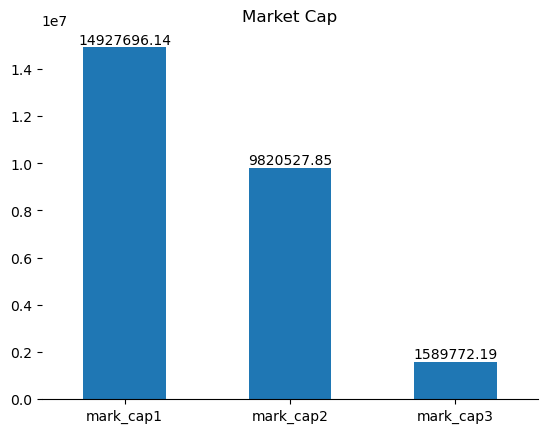

In [18]:
ax = mark_cap.groupby('mark_cap').sum()['values'].plot(kind='bar')
for i, v in enumerate(mark_cap.groupby('mark_cap').sum().reset_index()['values'].values.flatten()):
    plt.text(i, v, format(v), ha='center', va='bottom', fontweight='light', color='black', fontsize=10, alpha=1)
plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('')
plt.title("Market Cap")
plt.xticks(rotation=0)
plt.show()


## IV. Pick 10 random companies from the entire group and visualize the following through a line chart

C:\Users\Mansi Bansal\AppData\Local\Temp\ipykernel_7724\663535224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Name'] = data['Name'].str.replace(" ","\\")


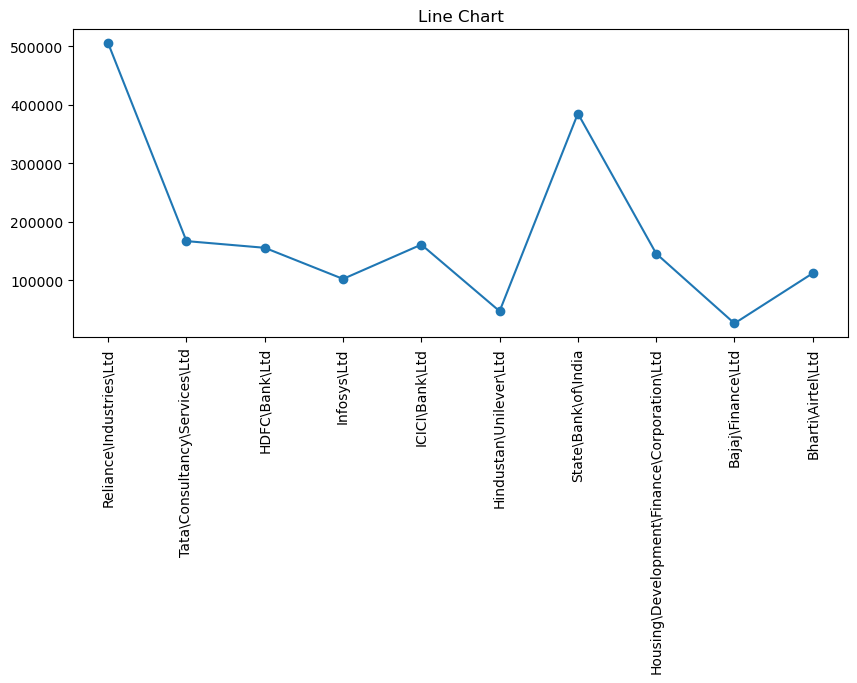

In [20]:
plt.figure(figsize=(10,4))
Name = df['Name'].unique()[0:10]
data = df[df['Name'].isin(Name)]
data['Name'] = data['Name'].str.replace(" ","\\")
# Create the line chart
plt.plot(data['Name'], data['Total Revenue'], marker='o', linestyle='-')
plt.title('Line Chart')
plt.xticks(rotation=90, ha='center')
# Show the plot
plt.show()


## V. Find the intrinsic value of the company based on 3 cases of growth: Good, Bad, and Best.

In [28]:
def growth_cat(row):
    if row['5Y Historical Revenue Growth'] < -5:
        val = 'Bad'
    elif row['5Y Historical Revenue Growth'] > -5 and row['5Y Historical Revenue Growth'] < 25:
        val = 'Good'
    elif row['5Y Historical Revenue Growth'] > 25:
        val = 'Best'
    return val

In [29]:
df['Growth'] = df.apply(growth_cat,axis=1)

In [34]:
data = df.sample(15,axis=0)[['Name','Market Cap','Growth']]

In [35]:
import plotly.express as px
px.line(data,x=data['Name'],y=data['Growth'],labels={'X':'Name','y':'Growth'}, title = 'Performence')

## Identify companies with consistently high or low financial performance.

In [25]:
data = df.groupby('Name').agg({'Net Profit Margin':'mean'}).reset_index().sort_values('Net Profit Margin',ascending=False)

#### Highest performence

In [26]:
data.head()

,Name,Net Profit Margin
707,Hexa Tradex Ltd,2443.589744
80,Alembic Ltd,409.165772
1706,Sundaram Finance Holdings Ltd,114.898911
1880,V L S Finance Ltd,99.166592
1898,Vardhman Holdings Ltd,95.586716


### lowest performence

In [27]:
data.tail()

,Name,Net Profit Margin
431,Deccan Gold Mines Ltd,-8.050000e+03
1468,Reliance Naval and Engineering Ltd,-1.120693e+04
108,Andhra Cements Ltd,-1.322903e+04
1599,Sharp India Ltd,-1.682727e+04
924,Jyoti Structures Ltd,-1.172500e+06
